In [1]:
# XBRAIN demo notebook

# ilastik params
classifier_file = 'xbrain_vessel_seg_v7.ilp'
image_file = 'xbrain_test_set_2a.npy'
ram_size = 4000 #4000 MB                                                                            
no_of_threads = 8

# Cell detection parameters                                                                         
cell_probability_threshold  = 0.2
stopping_criterion = 0.47
initial_template_size = 18
dilation_size = 8
max_no_cells = 500

# Vessel segmentation parameters                                                                    
vessel_probability_threshold = .68
dilation_size = 3
minimum_size = 4000

In [2]:
# imports 
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp
import xbrain

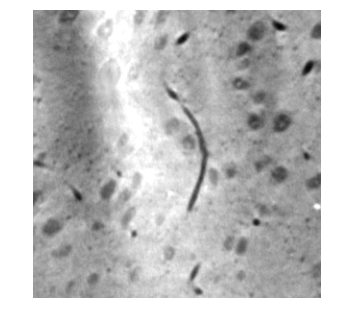

(300, 300, 100)


In [3]:
# load data
input_data = np.load(image_file)#[200:500,200:500,50:100] # only use partial for demo TODO
ndp.plot(input_data,50)
print(input_data.shape)

In [4]:
# run ilastik
probability_maps = xbrain.classify_pixel(input_data, classifier_file, threads=no_of_threads, ram=ram_size)

Failed to import fast filters: No module named 'fastfilters'
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Could not find any ILP solver
Could not find any ILP solver
Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!
Failed to import 'Edge Training With Multicut' workflow; check dependencies: Can't import OpMulticut: No solver libraries detected!


INFO ilastik_main: Starting ilastik from "/opt/conda".
Starting ilastik from "/opt/conda".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB


WARNING memory.py(100): DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
WARNING 2017-10-09 09:34:00,262 memory 405 139976258561792 User specified memory exceeds memory physically available. Please check theconfiguration.


INFO ilastik.shell.projectManager: Opening Project: xbrain_vessel_seg_v7.ilp


WARNING bind.py(27): DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()


input_data.shape (300, 300, 100)
label_names, label_colors, probability_colors ['Background', 'Blood Vessel', 'Cell Body'] [(255, 0, 0), (0, 255, 0), (0, 0, 255)] [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 216.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (97, 96, 97, 3)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 372.1MiB
DEBUG lazyflow.operators.classifierOperators: Training: 00% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 00% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 00% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 00% (Computing featur

DEBUG lazyflow.operators.classifierOperators: Training: 85% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 87% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 90% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 93% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 95% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training: 100% (Computing features)
DEBUG lazyflow.operators.classifierOperators: Training new classifier: Parallel Vigra Random Forest Factory (100 trees total)
INFO lazyflow.classifiers.parallelVigraRfLazyflowClassifier: Training took, 91.632642 seconds
INFO lazyflow.classifiers.parallelVigraRfLazyflowClassifier: Training complete. Average OOB: 0.00463961505238446
DEBUG lazyflow.operators.classifierOperators: Training: 100% (Complete)
DEBUG lazyflow.operators.classifierOperators: Features took 0.388815 seconds, Prediction took 0.169478 secon

cell_prob_map shape (300, 300, 100)


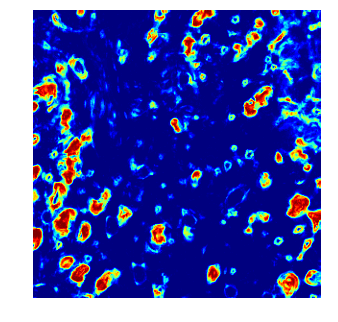

vessel_prob_map shape (300, 300, 100)


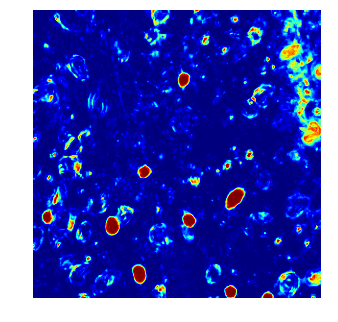

In [5]:
# display results

cell_prob_map = probability_maps[:, :, :, 2]
vessel_prob_map = probability_maps[:, :, :, 1]

print("cell_prob_map shape", cell_prob_map.shape)
ndp.plot(cell_prob_map, slice=50, cmap1='jet', alpha=0.5)


print("vessel_prob_map shape", vessel_prob_map.shape)
ndp.plot(vessel_prob_map, slice=50, cmap1='jet')


In [6]:
# reload packages for testing new algorithms
# import importlib
# importlib.reload(xbrain)

# cell detection
centroids, cell_map = xbrain.detect_cells(cell_prob_map, cell_probability_threshold, stopping_criterion, initial_template_size, dilation_size, max_no_cells)
print(centroids)


WARNING _bootstrap.py(205): ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__


Iteration remaining =  499 Correlation =  [[ 0.93660432]]
Iteration remaining =  489 Correlation =  [[ 0.8577866]]
Iteration remaining =  479 Correlation =  [[ 0.8248089]]
Iteration remaining =  469 Correlation =  [[ 0.80590367]]
Iteration remaining =  459 Correlation =  [[ 0.77998406]]
Iteration remaining =  449 Correlation =  [[ 0.75593549]]
Iteration remaining =  439 Correlation =  [[ 0.73178744]]
Iteration remaining =  429 Correlation =  [[ 0.71000797]]
Iteration remaining =  419 Correlation =  [[ 0.69689095]]
Iteration remaining =  409 Correlation =  [[ 0.67170775]]
Iteration remaining =  399 Correlation =  [[ 0.64776272]]
Iteration remaining =  389 Correlation =  [[ 0.63696653]]
Iteration remaining =  379 Correlation =  [[ 0.59988058]]
Iteration remaining =  369 Correlation =  [[ 0.58081603]]
Iteration remaining =  359 Correlation =  [[ 0.56382561]]
Iteration remaining =  349 Correlation =  [[ 0.53625798]]
Iteration remaining =  339 Correlation =  [[ 0.51978898]]
Iteration remain

In [7]:
# find vessels
vessel_map = xbrain.segment_vessels(vessel_prob_map, vessel_probability_threshold, dilation_size, minimum_size)


Vessel Segmentation


WARNING assess.py(299): MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
WARNING __init__.py(917): UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
WARNING rcsetup.py(152): UserWarning: axes.hold is deprecated, will be removed in 3.0


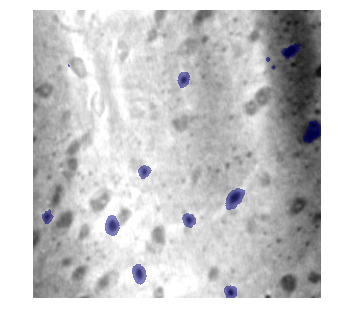

Cell Segmentation


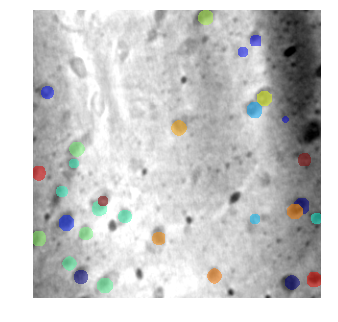

In [8]:
# show results

print("Vessel Segmentation")
ndp.plot(input_data, vessel_map, slice = 50, alpha = 0.5)

print("Cell Segmentation")
ndp.plot(input_data, cell_map, slice = 50, alpha = 0.5)
